In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

(X_train, _), (_, _) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Conv2DTranspose, Flatten, Conv2D, Input
from tensorflow.keras.optimizers import Adam

In [ ]:
X_train = X_train / 127.5 - 1.0

In [ ]:
X_train = np.expand_dims(X_train, axis=-1)

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
generator = Sequential([
    Dense(7*7*128, input_shape=(100,)),
    Reshape((7, 7, 128)),
    Conv2DTranspose(128, kernel_size=3, strides=2, padding='same'),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Conv2DTranspose(64, kernel_size=3, strides=1, padding='same'),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Conv2DTranspose(1, kernel_size=3, strides=2, padding='same', activation='tanh')
])


In [ ]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              633472    
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 14, 14, 128)       147584    
 anspose)                                                        
                                                                 
 batch_normalization (Batch  (None, 14, 14, 128)       512       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 14, 14, 128)       0         
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 14, 14, 64)        7

In [ ]:
discriminator = Sequential([
    Conv2D(64, kernel_size=3, strides=2, padding='same', input_shape=[28, 28, 1]),
    LeakyReLU(alpha=0.01),
    Conv2D(128, kernel_size=3, strides=2, padding='same'),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [ ]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 64)        640       
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 batch_normalization_2 (Bat  (None, 7, 7, 128)         512       
 chNormalization)                                                
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 7, 7, 128)         0         
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                      

In [ ]:
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5), metrics=['accuracy'])

In [ ]:
discriminator.trainable = False

In [ ]:
gan_input = Input(shape=(100,))
gan_output = discriminator(generator(gan_input))
gan = Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5))

In [ ]:
batch_size = 64
epochs = 2000

In [ ]:
for epoch in range(epochs):
    noise = np.random.normal(0, 1, (batch_size, 100))
    generated_images = generator.predict(noise)
    real_images = X_train[np.random.randint(0, X_train.shape[0], batch_size)]

    # Train discriminator
    d_loss_real = discriminator.train_on_batch(real_images, np.ones(batch_size))
    d_loss_fake = discriminator.train_on_batch(generated_images, np.zeros(batch_size))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train generator
    noise = np.random.normal(0, 1, (batch_size, 100))
    g_loss = gan.train_on_batch(noise, np.ones(batch_size))

    # Print progress
    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, D Loss: {d_loss[0]}, G Loss: {g_loss}")

2/2 [==============================] - 0s 47ms/step
Epoch: 0, D Loss: 0.6087123304605484, G Loss: 0.6700581908226013
2/2 [==============================] - 0s 47ms/step
Epoch: 100, D Loss: 0.0018397588282823563, G Loss: 0.11206823587417603
2/2 [==============================] - 0s 74ms/step
Epoch: 200, D Loss: 0.0002992004592670128, G Loss: 0.0005722943460568786
2/2 [==============================] - 0s 50ms/step
Epoch: 300, D Loss: 0.0002658458106452599, G Loss: 4.532039383775555e-06
2/2 [==============================] - 0s 47ms/step
Epoch: 400, D Loss: 0.0009723222174216062, G Loss: 0.0024816973600536585
2/2 [==============================] - 0s 46ms/step
Epoch: 500, D Loss: 0.0032760140020400286, G Loss: 0.04826167970895767
2/2 [==============================] - 0s 68ms/step
Epoch: 600, D Loss: 0.0006749571184627712, G Loss: 0.01590493693947792
2/2 [==============================] - 0s 47ms/step
Epoch: 700, D Loss: 0.000924046165891923, G Loss: 0.005830421578139067
2/2 [===========

In [ ]:
noise = np.random.normal(0, 1, (10, 100))
generated_images = generator.predict(noise)

1/1 [==============================] - 0s 165ms/step


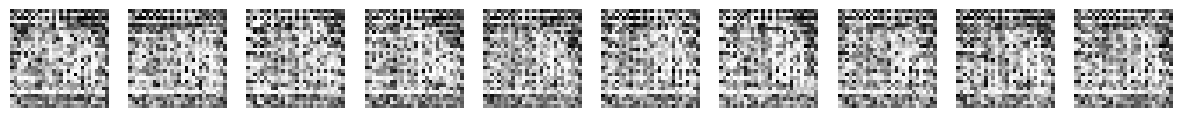

In [ ]:
# Display generated images
plt.figure(figsize=(15, 15))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow((generated_images[i].reshape(28, 28) + 1) * 0.5,cmap='graEy')
    plt.axis('off')
plt.show()

1/1 [==============================] - 0s 34ms/step


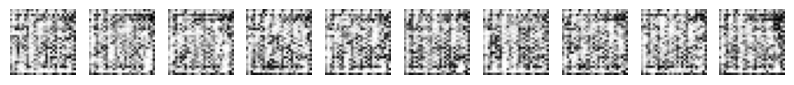

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random noise
image_shape = (28, 28, 1)
num_images = 10
latent_dim = 100
noise = np.random.normal(0, 1, (num_images, latent_dim))

# Generate images from noise
generated_images = generator.predict(noise)

# Display generated images
plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow((generated_images[i].reshape(image_shape) + 1) * 0.5, cmap='gray')
    plt.axis('off')
plt.show()
